In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Activation, Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import os
import random
import glob
from tensorflow.keras.utils import to_categorical
%matplotlib inline


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.getcwd()

'/content'

In [ ]:
train = "/content/drive/MyDrive/Cats vs dogs/train/train"
test = "/content/drive/MyDrive/Cats vs dogs/test/test"
valid = "/content/drive/MyDrive/Cats vs dogs/valid/valid"

In [ ]:
train_batches = ImageDataGenerator(preprocessing_function = tf.keras.applications.mobilenet.preprocess_input)\
.flow_from_directory(directory = train, target_size = (224,224), classes = ['cat','dog'], batch_size=10)

valid_batches = ImageDataGenerator(preprocessing_function = tf.keras.applications.mobilenet.preprocess_input)\
.flow_from_directory(directory = valid, target_size=(224,224),classes = ['cat','dog'], batch_size=10)

test_batches = ImageDataGenerator(preprocessing_function = tf.keras.applications.mobilenet.preprocess_input)\
.flow_from_directory(directory = test, target_size=(224,224),classes = ['cat','dog'], batch_size=10)

Found 1000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [ ]:
assert train_batches.n == 1000
assert valid_batches.n == 200
assert test_batches.n == 100

assert train_batches.num_classes == valid_batches.num_classes == test_batches.num_classes == 2


In [ ]:
train_labels = to_categorical(train_batches.classes,num_classes=2)
valid_labels = to_categorical(valid_batches.classes,num_classes=2)

In [ ]:
imgs, labels = next(train_batches)

In [ ]:
def plotImages(images_arr):
  fig, axes = plt.subplots(1,10,figsize=(20,20))
  axes = axes.flatten()

  for img, ax in zip(images_arr, axes):
    ax.imshow(img)
    ax.axis('off')
  plt.tight_layout()
  plt.show()

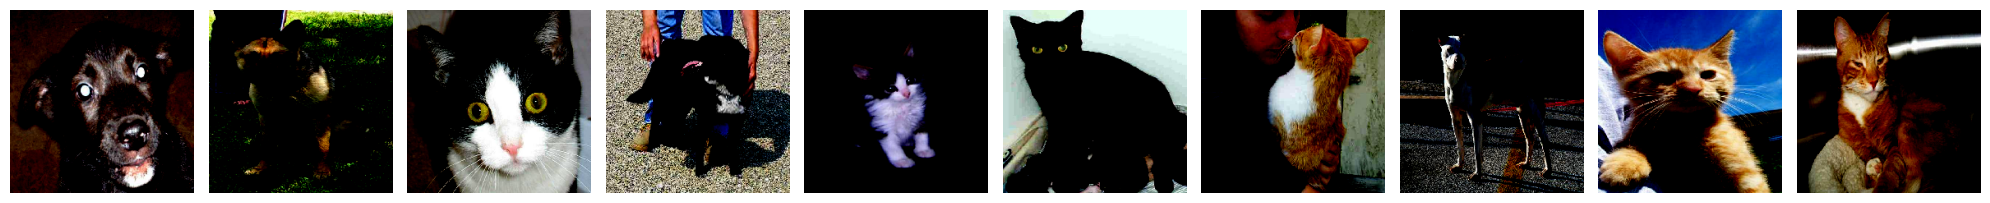

In [ ]:
plotImages(imgs)

In [ ]:
print(labels)

[[0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]]


In [ ]:
model_own = keras.Sequential([
    Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same', input_shape=(224,224,3)), # 3 is for rgb color configuration
    MaxPool2D(pool_size=(2,2), strides=2),
    Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
    MaxPool2D(pool_size=(2,2), strides=2),
    Flatten(),
    Dense(units=2, activation='softmax'), # since ther are only two classes cats and dogs.
])

In [ ]:
model_own.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model_own.fit(x=train_batches, validation_data=valid_batches, epochs=20, verbose=2)

Epoch 1/20
100/100 - 189s - loss: 0.7316 - accuracy: 0.5630 - val_loss: 0.6785 - val_accuracy: 0.5800 - 189s/epoch - 2s/step
Epoch 2/20
100/100 - 5s - loss: 0.5681 - accuracy: 0.6950 - val_loss: 0.6081 - val_accuracy: 0.6700 - 5s/epoch - 50ms/step
Epoch 3/20
100/100 - 4s - loss: 0.4904 - accuracy: 0.7730 - val_loss: 0.6163 - val_accuracy: 0.6200 - 4s/epoch - 41ms/step
Epoch 4/20
100/100 - 4s - loss: 0.3871 - accuracy: 0.8590 - val_loss: 0.5959 - val_accuracy: 0.6650 - 4s/epoch - 41ms/step
Epoch 5/20
100/100 - 5s - loss: 0.3388 - accuracy: 0.8860 - val_loss: 0.6225 - val_accuracy: 0.6500 - 5s/epoch - 50ms/step
Epoch 6/20
100/100 - 4s - loss: 0.2369 - accuracy: 0.9450 - val_loss: 0.5983 - val_accuracy: 0.6850 - 4s/epoch - 40ms/step
Epoch 7/20
100/100 - 4s - loss: 0.1889 - accuracy: 0.9680 - val_loss: 0.6284 - val_accuracy: 0.6850 - 4s/epoch - 40ms/step
Epoch 8/20
100/100 - 5s - loss: 0.1437 - accuracy: 0.9760 - val_loss: 0.6888 - val_accuracy: 0.6150 - 5s/epoch - 51ms/step
Epoch 9/20
100

In [ ]:
predict_mod = model_own.predict(x=test_batches, verbose=0)
predict_mod[0]

array([0.03274747, 0.96725255], dtype=float32)

In [ ]:
model_own.save("/content/drive/Othercomputers/My Laptop/E:/Cats vs dogs flask/cats_dogs_classifier.h5")